###  Libraries

In [ ]:
# Import libraries
import numpy as np
import torch
import sys
from Datasets.Datasets import get_dataset
from Autoencoder import Autoencoder, CD_Autoencoder
from Visualization import Visualization
from General_Functions import General_Functions

### Global Variables

In [ ]:
# Set path to module
path_to_module = './'
sys.path.append(path_to_module)

# Set device (cuda or cpu)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    torch.cuda.set_device(device)

### Visualization

In [ ]:
visualization = Visualization()

### Load Dataset

In [16]:
# Set dataset_name, module_name, batch_size and n_clusters
dataset_name = "emnist_balanced_letters_K_T" # The available datasets are: emnist_balanced_digits, emnist_mnist, emnist_balanced_letters_A_J, emnist_balanced_letters_K_T, emnist_balanced_letters_U_Z, har, pendigits, waveform_v1, synthetic
batch_size = 256
n_clusters = 10

# Get dataloader, input_dim, data_np and labels
dataloader, input_dim, data_np, labels = get_dataset(dataset_name, batch_size)
print('Data_Shape is:', input_dim)
print('Batches Number is:', len(dataloader))
print(np.unique(labels))

Data_Shape is: 1
Batches Number is: 110
[20 21 22 23 24 25 26 27 28 29]


### Parameters

In [17]:
# Set latent dimension and negative slope
latent_dim = 10
negative_slope = 0

# Set pre-training epochs and learning rate
n_pret_epochs = 100
pret_lr = 1e-3

# Set lamdas, training epochs and learning rate
sil_lambda = 0.01
entr_lambda = 0.01
n_epochs = 100
lr = 5e-4

# Set use_pretrain and is_mlp_ae
use_pretrain = True # Set True for pretraining autoencoder or set False for using already pretrained weights
is_mlp_ae = False # Set True for tabular datasets e.g. pendigits or set False for image datasets e.g. emnist_mnist

### Create Autoencoder Model

In [18]:
if is_mlp_ae:
    autoencoder = Autoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim, negative_slope=negative_slope)
else:
    autoencoder = CD_Autoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim, negative_slope=negative_slope)

autoencoder.set_general_training_variables(dataloader=dataloader, batch_size=batch_size)
autoencoder.set_pretraining_variables(n_pret_epochs=n_pret_epochs, pret_lr=pret_lr)
autoencoder.set_training_variables(n_epochs=n_epochs, lr=lr, sil_lambda=sil_lambda, entr_lambda=entr_lambda)
autoencoder.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
autoencoder.set_path()
autoencoder = autoencoder.to(device)

### Pretrain Autoencoder

In [19]:
if(use_pretrain):
    autoencoder.pretrain_autoencoder()
    autoencoder.save_pretrained_weights()
else:
    model_save_path = autoencoder.data_dir_path + '/Weigths/autoencoder_weights.pth'
    autoencoder.load_state_dict(torch.load(model_save_path))

Epoch: 0, Loss: 60.936741
Epoch: 1, Loss: 38.228184
Epoch: 2, Loss: 26.600844
Epoch: 3, Loss: 18.418128
Epoch: 4, Loss: 12.613574
Epoch: 5, Loss: 8.624653
Epoch: 6, Loss: 5.976888
Epoch: 7, Loss: 4.275576
Epoch: 8, Loss: 3.224853
Epoch: 9, Loss: 2.618094
Epoch: 10, Loss: 2.268651
Epoch: 11, Loss: 2.080150
Epoch: 12, Loss: 1.994438
Epoch: 13, Loss: 1.930967
Epoch: 14, Loss: 1.899228
Epoch: 15, Loss: 1.886195
Epoch: 16, Loss: 1.871624
Epoch: 17, Loss: 1.836135
Epoch: 18, Loss: 1.830685
Epoch: 19, Loss: 1.824490
Epoch: 20, Loss: 1.815544
Epoch: 21, Loss: 1.797351
Epoch: 22, Loss: 1.788398
Epoch: 23, Loss: 1.775324
Epoch: 24, Loss: 1.763505
Epoch: 25, Loss: 1.755654
Epoch: 26, Loss: 1.747386
Epoch: 27, Loss: 1.741292
Epoch: 28, Loss: 1.720785
Epoch: 29, Loss: 1.710522
Epoch: 30, Loss: 1.704186
Epoch: 31, Loss: 1.690592
Epoch: 32, Loss: 1.670201
Epoch: 33, Loss: 1.677917
Epoch: 34, Loss: 1.675189
Epoch: 35, Loss: 1.662951
Epoch: 36, Loss: 1.642090
Epoch: 37, Loss: 1.655705
Epoch: 38, Loss: 

### Initialize the clustering layer using k-means

In [20]:
autoencoder.kmeans_initialization(n_init=100)

ACC: 0.85 PUR: 0.85 NMI: 0.75 ARI: 0.71


### Train Autoencoder

In [21]:
latent_data, labels, clustering = autoencoder.train_autoencoder()

Ep: 0 Rec L: 1.3786 Cl L: 1.1376 Entropy: 3.5935 SSil: -3.7562 ACC: 0.84 PUR: 0.84 NMI: 0.75 ARI: 0.71
Ep: 1 Rec L: 1.3615 Cl L: 1.1528 Entropy: 3.5404 SSil: -5.2834 ACC: 0.84 PUR: 0.84 NMI: 0.75 ARI: 0.70
Ep: 2 Rec L: 1.3713 Cl L: 1.1705 Entropy: 3.4814 SSil: -7.0522 ACC: 0.84 PUR: 0.84 NMI: 0.74 ARI: 0.69
Ep: 3 Rec L: 1.3720 Cl L: 1.1902 Entropy: 3.4020 SSil: -9.0234 ACC: 0.84 PUR: 0.84 NMI: 0.75 ARI: 0.70
Ep: 4 Rec L: 1.4007 Cl L: 1.2084 Entropy: 3.2728 SSil: -10.8440 ACC: 0.85 PUR: 0.85 NMI: 0.76 ARI: 0.72
Ep: 5 Rec L: 1.4604 Cl L: 1.2114 Entropy: 3.0175 SSil: -11.1437 ACC: 0.87 PUR: 0.87 NMI: 0.79 ARI: 0.76
Ep: 6 Rec L: 1.6086 Cl L: 1.1503 Entropy: 2.5776 SSil: -5.0349 ACC: 0.89 PUR: 0.89 NMI: 0.82 ARI: 0.79
Ep: 7 Rec L: 1.7419 Cl L: 1.0527 Entropy: 2.1715 SSil: 4.7293 ACC: 0.90 PUR: 0.90 NMI: 0.84 ARI: 0.81
Ep: 8 Rec L: 1.7542 Cl L: 0.9962 Entropy: 1.9888 SSil: 10.3784 ACC: 0.90 PUR: 0.90 NMI: 0.85 ARI: 0.81
Ep: 9 Rec L: 1.7512 Cl L: 0.9626 Entropy: 1.9003 SSil: 13.7404 ACC: 0.90

### Save Clustering Results

In [22]:
General_Functions().save_excel(autoencoder.data_dir_path, autoencoder.df_eval)

Directory './Results/emnist_balanced_letters_K_T/SSAE/100_Eps_ld_10_out_10_bs_256_lr_0.0005_sil_lambda_0.01_entr_lambda_0.01' already exists.


### Plot Clustering Results

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28010 samples in 0.033s...
[t-SNE] Computed neighbors for 28010 samples in 1.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28010
[t-SNE] Computed conditional probabilities for sample 2000 / 28010
[t-SNE] Computed conditional probabilities for sample 3000 / 28010
[t-SNE] Computed conditional probabilities for sample 4000 / 28010
[t-SNE] Computed conditional probabilities for sample 5000 / 28010
[t-SNE] Computed conditional probabilities for sample 6000 / 28010
[t-SNE] Computed conditional probabilities for sample 7000 / 28010
[t-SNE] Computed conditional probabilities for sample 8000 / 28010
[t-SNE] Computed conditional probabilities for sample 9000 / 28010
[t-SNE] Computed conditional probabilities for sample 10000 / 28010
[t-SNE] Computed conditional probabilities for sample 11000 / 28010
[t-SNE] Computed conditional probabilities for sample 12000 / 28010
[t-SNE] Computed conditional probabilities for sam

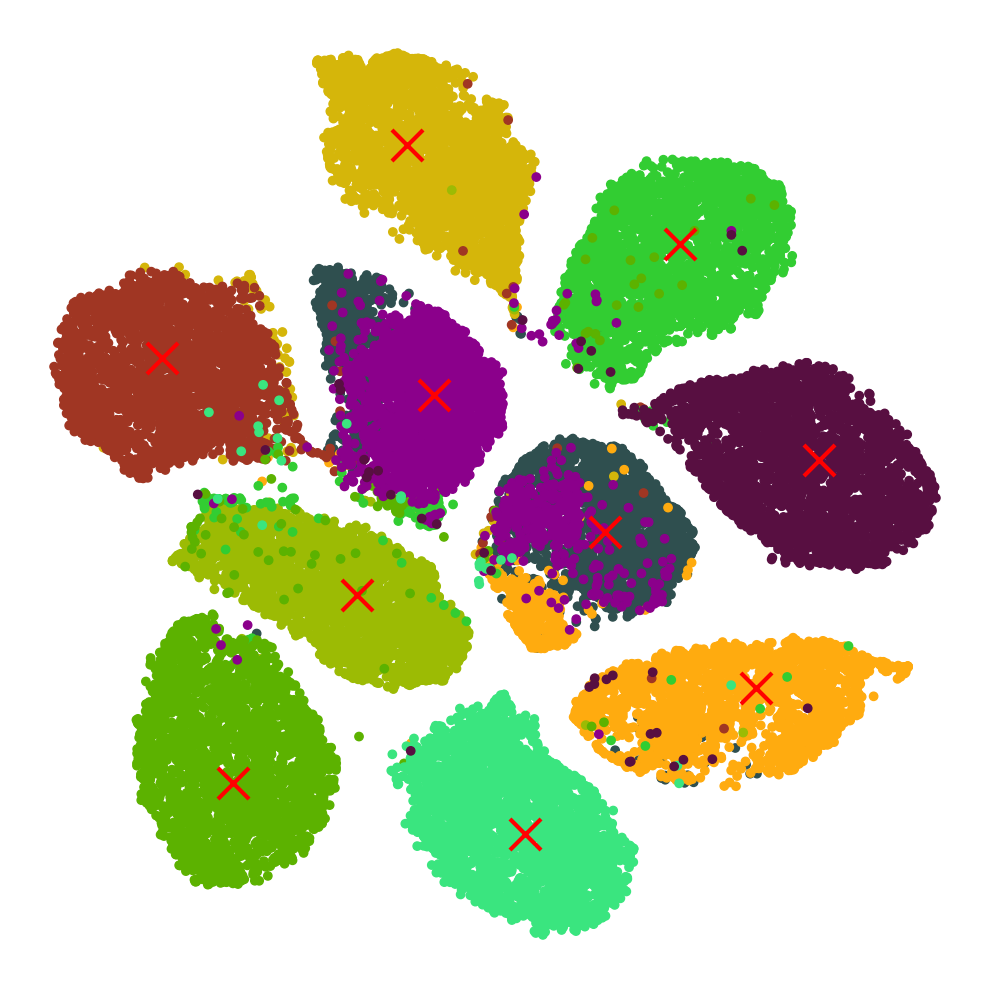

In [24]:
cluster_centers = autoencoder.get_cluster_centers().cpu().detach().numpy()
data, latent_data, labels = autoencoder.get_latent_data()
visualization.plot_tsne(latent_data, labels, clustering, cluster_centers, autoencoder.data_dir_path)